[Fiddler 2026-02-13](https://thefiddler.substack.com/p/can-you-get-the-rover-home)
====================

Fiddler
-------
Let $R = 1000\text{mi}$ be the planet's radius.  Let the latitude of the landing point be $\pi/2$.
Let the latitude of the other two turning points be $\theta$.  Let the longitude of the first
turning point be $0$ and the longitude of the second turning point be $2\pi/3$.

Then, $s = (\pi/2-\theta)R$, which must be equal to the great circle distance between the first and
second turning points.  The straight-line distance between those two points must be same as the
straight-line distance to the landing point.

In [1]:
R, theta = var("R,theta")
x0 = 0
y0 = 0
z0 = R
x1 = R*cos(theta)
y1 = 0
z1 = R*sin(theta)
x2 = R*cos(theta)*cos(2*pi/3)
y2 = R*cos(theta)*sin(2*pi/3)
z2 = R*sin(theta)
solve((x1-x0)^2 + (y1-y0)^2 + (z1-z0)^2 == (x2-x1)^2 + (y2-y1)^2 + (z2-z1)^2, theta)

[sin(theta) == -sqrt(2)*cos(theta) + 1, sin(theta) == sqrt(2)*cos(theta) + 1]

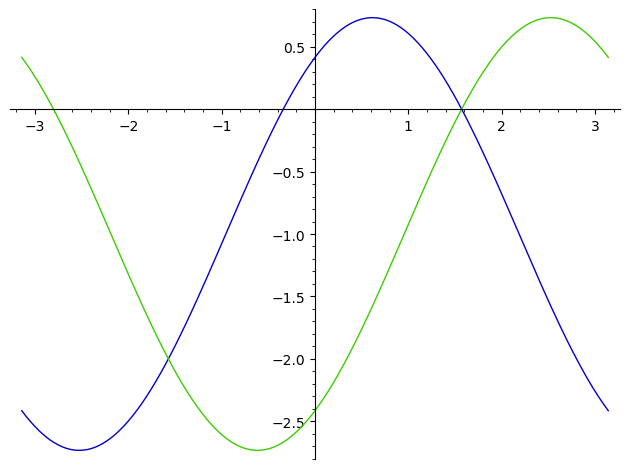

In [2]:
plot([sin(theta) + sqrt(2)*cos(theta) - 1, sin(theta) - sqrt(2)*cos(theta) - 1], theta, -pi, pi)

The $\theta = \pi/2$ solution corresponds to the trivial solution of $s = 0$, which is not
relevant, but will be relevant for the extra credit.

The other two solutions correspond to the relevant solution, $s \approx 1910.6\text{mi}$,
and $2\pi R - s \approx 4372.6\text{mi}$, which is the complementary great circle to the solution.

In [3]:
s = numerical_approx(pi/2 - find_root(sin(theta) + sqrt(2)*cos(theta) - 1, -1, 0))
scomp = numerical_approx(pi/2 - find_root(sin(theta) - sqrt(2)*cos(theta) - 1, -3, -2))
s, numerical_approx(2*pi - s), scomp

(1.91063323624907, 4.37255207093051, 4.37255207093057)

Using Wolfram Alpha, the exact solution is

In [4]:
s = pi/2 + 2*arctan(3-2*sqrt(2))
show(s*R)
numerical_approx(s)

1/2*(pi + 4*arctan(-2*sqrt(2) + 3))*R

1.91063323624902

Extra credit
------------
This almost does not need the fiddler result, $s$.

There are $2\pi nR$, where $n \in 1, 2, \ldots N$, where $N = 15$, for which all the turns are
at the landing point.

In [5]:
numerical_approx(100/(2*pi))

15.9154943091895

There are also $s + 2\pi nR$, where $n \in 0, 1, \ldots N-1$, for which the $n=0$ path
is the fiddler solution, and $2\pi R - s + 2\pi nR$, where $n \in 0, 1, \ldots N-1$, 
for which the $n=0$ path are the complementary great circles to the fiddler solution.
These are distinct, because $s \ne \pi R$, otherwise the end point would be the polar
opposite to the landing point.  So there are at least 45.

Given that $2\pi(N+1)R$ is slightly more than $100R$, it's likely that both
$s + 2\pi NR$ and $2\pi R - s + 2\pi NR$ are both less than $100R$ and at least one of
them must be, so there are at least 46 and likely 47.

In [6]:
numerical_approx(s+2*pi*15), numerical_approx(2*pi-s+2*pi*15)

(96.1584128439428, 98.6203316786244)

Using the fiddler result, the answer is 47.